In [2]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [4]:
#https://www.inegi.org.mx/programas/enigh/nc/2018/default.html#Microdatos
path = 'results.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
date          41586 non-null object
home_team     41586 non-null object
away_team     41586 non-null object
home_score    41586 non-null int64
away_score    41586 non-null int64
tournament    41586 non-null object
city          41586 non-null object
country       41586 non-null object
neutral       41586 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [6]:
df.shape

(41586, 9)

In [7]:
df.shape[0]

41586

In [8]:
df.shape[1]

9

In [9]:
df.columns.values.tolist()

['date',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'tournament',
 'city',
 'country',
 'neutral']

In [10]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [11]:
df.isnull().any().any()

False

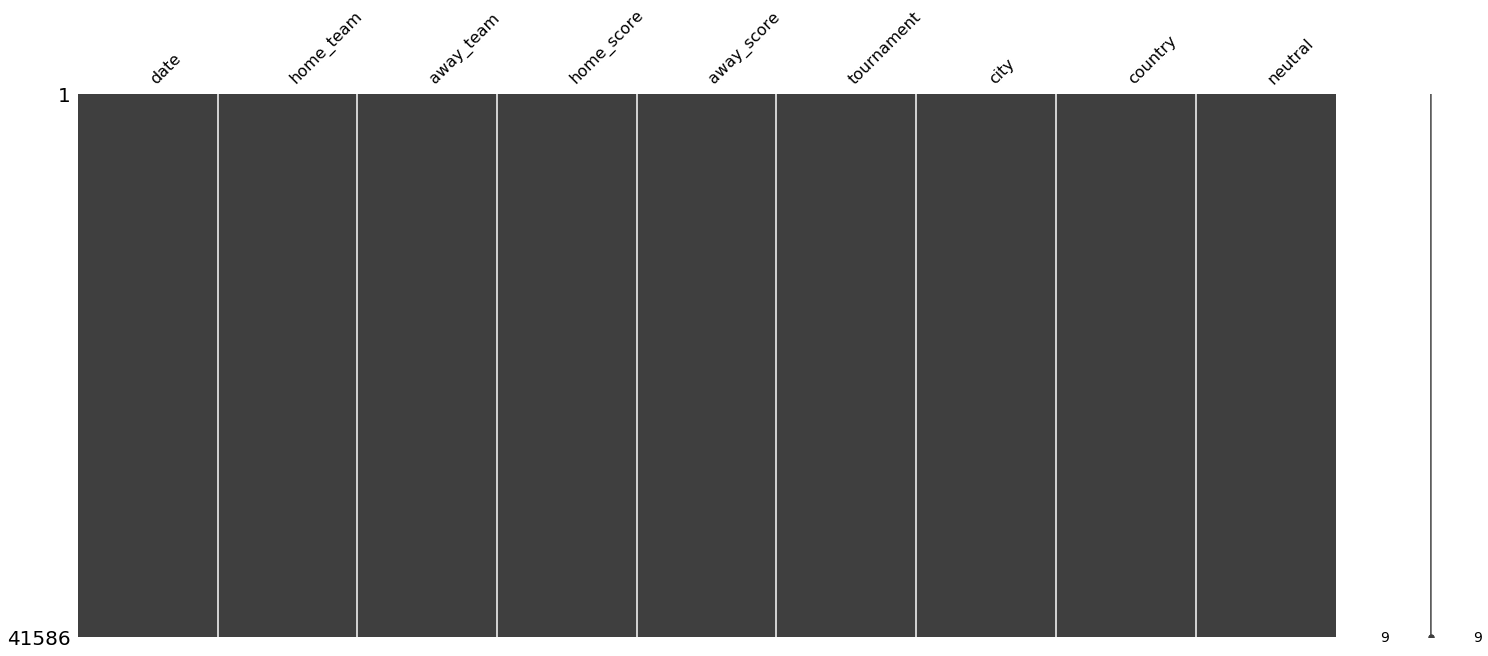

In [12]:
msno.matrix(df)

In [13]:
df.replace({' ': np.nan}, inplace=True)

In [14]:
df.isnull().any().any()

False

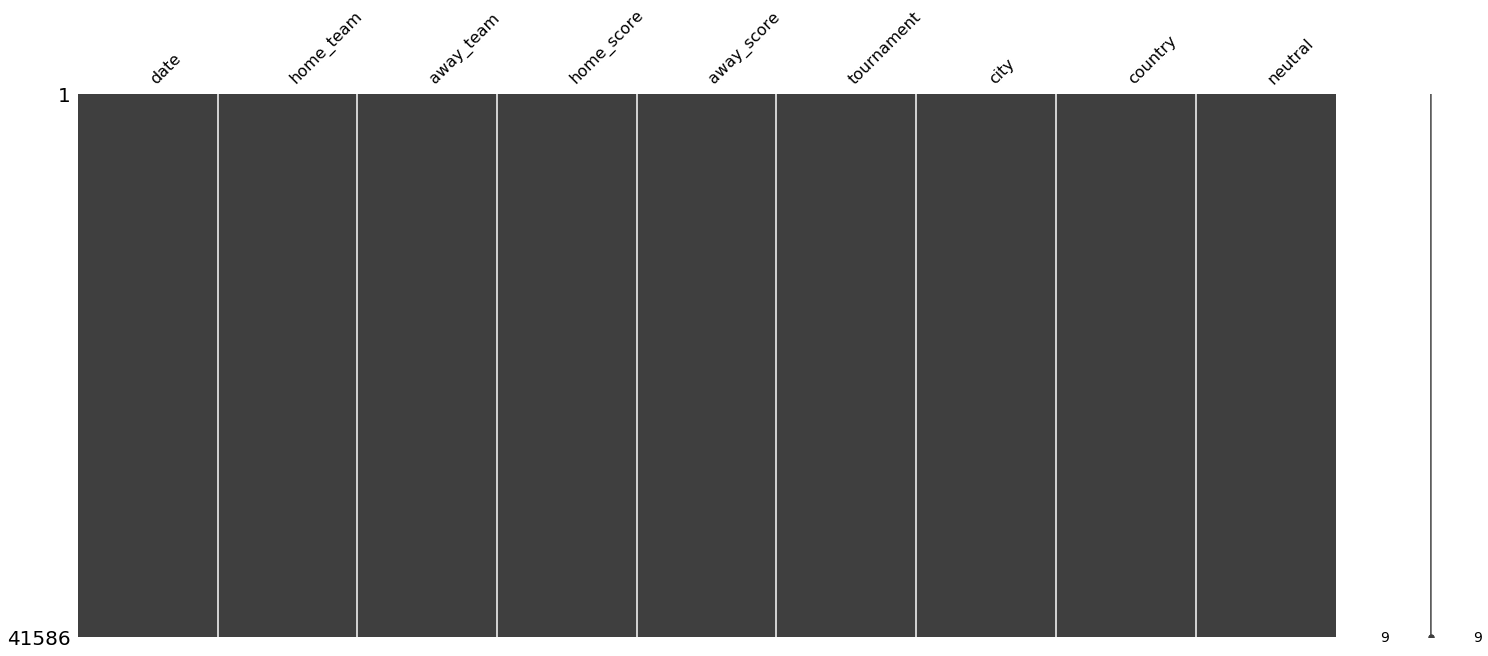

In [15]:
msno.matrix(df)

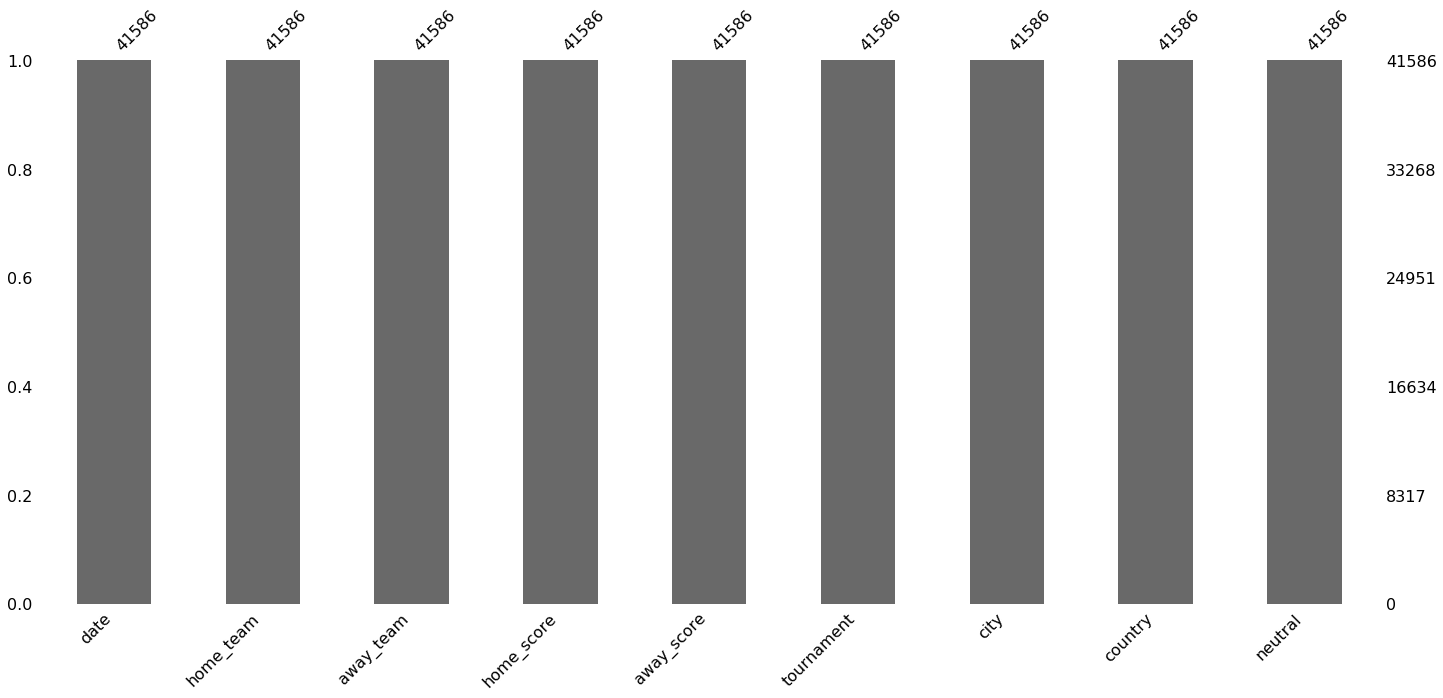

In [16]:
msno.bar(df)

In [17]:
df.columns[df.isnull().any()].tolist()

[]

In [18]:
df.describe()

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [19]:
df.loc[[0]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False


In [20]:
df.loc[30:33]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False


In [21]:
df.drop([0,24,51], axis=0).head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False


In [22]:
df.drop(df.index[1:5], axis=0).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False
12,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False
13,1880-03-13,Scotland,England,5,4,Friendly,Glasgow,Scotland,False


In [23]:
df[100:].head() #df.tail(-100) )

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
100,1895-03-23,Wales,Scotland,2,2,British Championship,Wrexham,Wales,False
101,1895-03-30,Scotland,Northern Ireland,3,1,British Championship,Glasgow,Scotland,False
102,1895-04-06,England,Scotland,3,0,British Championship,Liverpool,England,False
103,1896-02-29,Wales,Northern Ireland,6,1,British Championship,Wrexham,Wales,False
104,1896-03-07,Northern Ireland,England,0,2,British Championship,Belfast,Republic of Ireland,False


In [24]:
df['home_team'].values

array(['Scotland', 'England', 'Scotland', ..., 'Canada', 'El Salvador',
       'United States'], dtype=object)

In [25]:
df['home_team'].unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'CuraÃ§ao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba',

In [26]:
df['home_team'].value_counts()

Brazil                       568
Argentina                    548
Mexico                       513
Germany                      506
England                      498
                            ... 
Madrid                         1
Sark                           1
Saint Pierre and Miquelon      1
Saint Helena                   1
Central Spain                  1
Name: home_team, Length: 308, dtype: int64

In [27]:
df.agg(['count', 'size', 'nunique'])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
count,41586,41586,41586,41586,41586,41586,41586,41586,41586
size,41586,41586,41586,41586,41586,41586,41586,41586,41586
nunique,15196,308,305,26,22,112,2013,266,2


In [28]:
df.groupby('home_team').agg(['count', 'size', 'nunique']).stack()

date  away_team  home_score  away_score  tournament  \
home_team                                                                     
Abkhazia       count      18         18          18          18          18   
               size       18         18          18          18          18   
               nunique    18         13           6           3           3   
Afghanistan    count      40         40          40          40          40   
               size       40         40          40          40          40   
...                      ...        ...         ...         ...         ...   
Zimbabwe       size      190        190         190         190         190   
               nunique   190         47           7           6           8   
Ã
land Islands count      27         27          27          27          27   
               size       27         27          27          27          27   
               nunique    27         13           5           5           1   

                        city  country  neutral  
home_team                                       
Abkhazia       count      18       18       18  
               size       18       18       18  
               nunique     9        5        2  
Afghanistan    count      40       40       40  
               size       40       40       40  
...                      ...      ...      ...  
Zimbabwe       size      190      190      190  
               nunique    24       13        2  
Ã
land Islands count      27       27       27  
               size       27       27       27  
               nunique    17        8        2  

[924 rows x 8 columns]

In [29]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1540,1932-12-11,Belgium,Austria,1,6,Friendly,Brussels,Belgium,False
39551,2018-01-27,Moldova,South Korea,0,1,Friendly,Antalya,Turkey,True
23387,2000-10-28,Eritrea,Rwanda,0,1,Friendly,Lusaka,Zambia,True
21260,1998-05-27,Austria,Tunisia,2,1,Friendly,Vienna,Austria,False
34522,2012-10-12,Finland,Georgia,1,1,FIFA World Cup qualification,Helsinki,Finland,False


In [30]:
df.shape

(41586, 9)

In [31]:
df_sample.shape

(2079, 9)

In [32]:
df_dropped = df.dropna(subset=['home_team'])
df_dropped.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [33]:
df_dropped.shape

(41586, 9)

In [34]:
df_copy = df.copy()
df_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [35]:
df_copy.shape

(41586, 9)

In [36]:
df_dropped['tournament'].dtype

dtype('O')

In [37]:
df_dropped['home_score'].mean() 

1.745755783196268

In [38]:
df_copy['home_score'].fillna(value=np.round(df['home_score'].mean(),decimals=0), inplace=True)

In [39]:
df_copy.agg(['count', 'size', 'nunique'])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
count,41586,41586,41586,41586,41586,41586,41586,41586,41586
size,41586,41586,41586,41586,41586,41586,41586,41586,41586
nunique,15196,308,305,26,22,112,2013,266,2


In [40]:
list(df['home_team'].unique())

['Scotland',
 'England',
 'Wales',
 'Northern Ireland',
 'United States',
 'Uruguay',
 'Austria',
 'Hungary',
 'Argentina',
 'Belgium',
 'France',
 'Netherlands',
 'Czechoslovakia',
 'Switzerland',
 'Sweden',
 'Germany',
 'Italy',
 'Chile',
 'Norway',
 'Finland',
 'Luxembourg',
 'Russia',
 'Denmark',
 'Catalonia',
 'Basque Country',
 'Brazil',
 'Japan',
 'Paraguay',
 'Canada',
 'Estonia',
 'Costa Rica',
 'Guatemala',
 'Spain',
 'Brittany',
 'Poland',
 'Yugoslavia',
 'New Zealand',
 'Romania',
 'Latvia',
 'Galicia',
 'Portugal',
 'Andalusia',
 'China PR',
 'Australia',
 'Lithuania',
 'Turkey',
 'Central Spain',
 'Mexico',
 'Aruba',
 'Egypt',
 'Haiti',
 'Philippines',
 'Bulgaria',
 'Jamaica',
 'Kenya',
 'Bolivia',
 'Peru',
 'Honduras',
 'Guyana',
 'Uganda',
 'Belarus',
 'El Salvador',
 'Barbados',
 'Republic of Ireland',
 'Trinidad and Tobago',
 'Greece',
 'CuraÃ§ao',
 'Dominica',
 'Silesia',
 'Guadeloupe',
 'Israel',
 'Suriname',
 'French Guiana',
 'Cuba',
 'Colombia',
 'Ecuador',
 'Sai

In [41]:
keys = list(df['home_score'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{0: 1, 4: 2, 2: 3, 3: 4, 1: 5, 7: 6, 9: 7}

In [42]:
df_copy['home_score'] = df['home_score'].map(act)
df_copy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,1.0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,2.0,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,3.0,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,3.0,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,4.0,0,Friendly,Glasgow,Scotland,False


In [43]:
list(df_copy['home_score'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan]

In [44]:
df_copy['home_score'].mean()

3.2156015754033795

In [47]:
df_copy['home_score'][df_copy['away_team'] == 6]

Series([], Name: home_score, dtype: float64)

In [48]:
df_copy['home_score'][df_copy['away_team'] == 6].mean()

nan

In [49]:
df_copy.groupby(["home_team", "away_team", "home_score"]).count()

date  away_score  tournament  city  \
home_team      away_team      home_score                                       
Abkhazia       Artsakh        5.0            1           1           1     1   
               Chagos Islands 7.0            1           1           1     1   
               Chameria       1.0            1           1           1     1   
                              4.0            1           1           1     1   
               KÃ¡rpÃ¡talja   1.0            1           1           1     1   
...                                        ...         ...         ...   ...   
Ã
land Islands Saare County   4.0            1           1           1     1   
               Shetland       3.0            3           3           3     3   
                              4.0            1           1           1     1   
               Ynys MÃ´n      1.0            1           1           1     1   
                              2.0            1           1           1     1   

                                          country  neutral  
home_team      away_team      home_score                    
Abkhazia       Artsakh        5.0               1        1  
               Chagos Islands 7.0               1        1  
               Chameria       1.0               1        1  
                              4.0               1        1  
               KÃ¡rpÃ¡talja   1.0               1        1  
...                                           ...      ...  
Ã
land Islands Saare County   4.0               1        1  
               Shetland       3.0               3        3  
                              4.0               1        1  
               Ynys MÃ´n      1.0               1        1  
                              2.0               1        1  

[21157 rows x 6 columns]

In [50]:
df_copy.tournament

0        Friendly
1        Friendly
2        Friendly
3        Friendly
4        Friendly
           ...   
41581    Friendly
41582    Friendly
41583    Friendly
41584    Friendly
41585    Friendly
Name: tournament, Length: 41586, dtype: object

In [51]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1540,1932-12-11,Belgium,Austria,1,6,Friendly,Brussels,Belgium,False
39551,2018-01-27,Moldova,South Korea,0,1,Friendly,Antalya,Turkey,True
23387,2000-10-28,Eritrea,Rwanda,0,1,Friendly,Lusaka,Zambia,True
21260,1998-05-27,Austria,Tunisia,2,1,Friendly,Vienna,Austria,False
34522,2012-10-12,Finland,Georgia,1,1,FIFA World Cup qualification,Helsinki,Finland,False


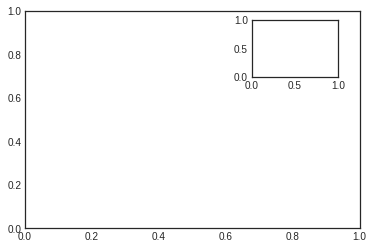

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

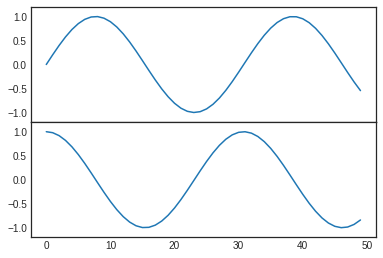

In [53]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

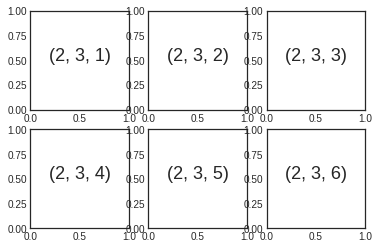

In [54]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

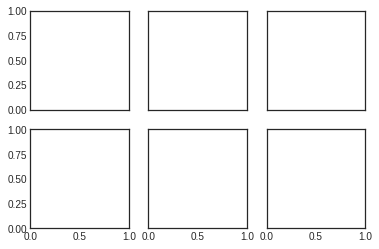

In [55]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

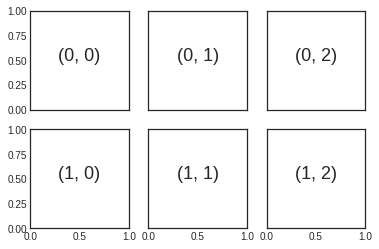

In [56]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

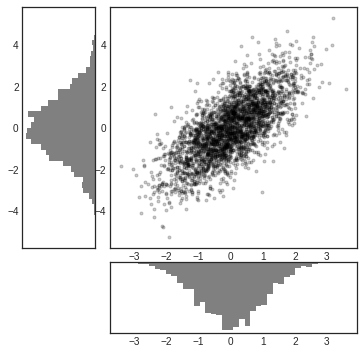

In [57]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

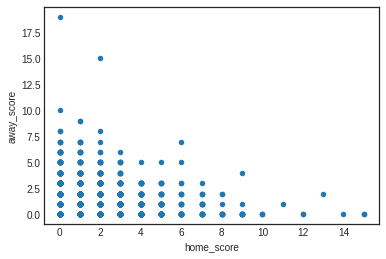

In [59]:
#figure.savefig('.../.jpeg')
#df_sample['ventas'] = dropna()
df_sample['home_score'] = df_sample['home_score'].astype('int64')

df_sample.plot(kind='scatter',x='home_score',y='away_score')

Text(0.5, 1.0, 'home score')

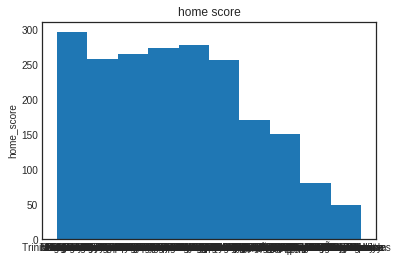

In [61]:
plt.hist(df_sample['home_team'])
plt.ylabel('home_score')
plt.title('home score')

Text(0.5, 1.0, 'Box Plot of ventas count')

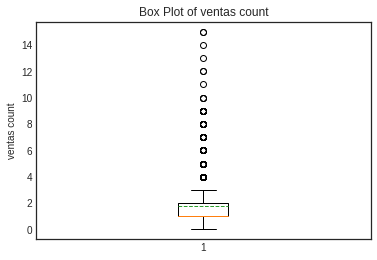

In [63]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_sample['home_score'], showmeans=True, meanline=True)
plt.ylabel('ventas count')
plt.title('Box Plot of ventas count')